In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.preprocessing import StandardScaler # normalização de dados
from sklearn.model_selection import train_test_split # dividir dados entre treinmaneto e teste
from sklearn.metrics import mean_absolute_error, accuracy_score
from tensorflow import keras

2023-06-05 16:04:45.944417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 16:04:50.336389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-05 16:04:50.336825: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-05 16:04:50.821743: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-05 16:05:07.312216: W tensorflow/stream_executor/platform/de

In [26]:
dataset_petr4 = pd.read_csv("PETR4.csv")
dataset_brent = pd.read_csv("brent_oil_futures.csv")


In [27]:
dataset_petr4 = dataset_petr4.dropna()

In [28]:
dataset_brent = dataset_brent.dropna()

In [29]:
dataset = pd.merge(dataset_petr4,dataset_brent, on="Date")

In [30]:
rename_colums = {
    "Price_x":"Price_petr4",
    "Price_y":"Price_brent",
    "Open_y":"Open_brent",
    "Vol._y":"Vol._brent"
}
dataset = dataset.rename(columns=rename_colums)

In [31]:
volumes = []
for volume in dataset['Vol._brent']:
    if 'M' in volume:
        volume = float(volume.replace('M',''))*1000000
    elif 'K' in volume:
        volume = float(volume.replace('K',''))*1000
    volumes.append(volume)

In [32]:
y = dataset["Price_petr4"]

In [33]:
dataset['Vol._brent'] = pd.Series(volumes)

In [34]:
dataset_features = ['Price_brent', "Open_brent", "Vol._brent"]
X = dataset[dataset_features]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [39]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100,input_shape = (X.shape[1],1), return_sequences = True))
model.add(keras.layers.LSTM(50, input_shape = (X.shape[1],1)))
model.add(keras.layers.Dense(1))  


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics = ['mean_absolute_error']
)
model.fit(
 X_train,
 y_train,
 epochs = 100,
 batch_size = 32
)



In [17]:
print("The predictions are")
y_predicted = model.predict(X_test)

The predictions are
23/23 [==============================] - 8s 29ms/step


In [ ]:

print("MAE")
mae = mean_absolute_error(y_test, y_predicted)

print("Value MAE:",mae)


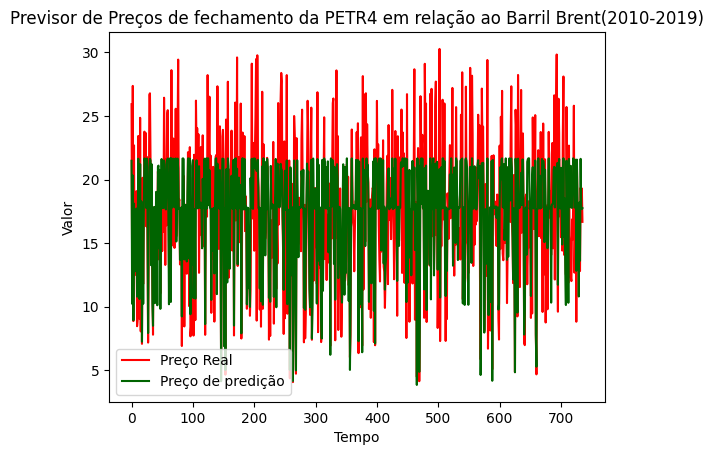

In [25]:
plt.plot(pd.array(y_test), color = 'red',label = 'Preço Real')
plt.plot(y_predicted, color = 'darkgreen', label="Preço de predição")
plt.title('Previsor de Preços de fechamento da PETR4 em relação ao Barril Brent(2010-2019)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()